In [2]:
# for analysis
import pandas as pd
import numpy as np
import os
# from scipy.optimize import curve_fit
import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('ggplot')
# for reverse geocoding routine
import urllib, json
import csv
# relevant system environment vars
data = os.getenv('PUIDATA')



Populating the interactive namespace from numpy and matplotlib


In [3]:
import datetime 
import calendar

my_date = datetime.datetime(2016, 10 , 03)
calendar.day_name[my_date.weekday()]

'Monday'

In [5]:
# my usual imports and setups
import pylab as pl
#imports downloader

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json


def getCitiBikeCSV(datestring):
    '''The function downloads a CSV file into the PUIDATA directory from the Citibike database for the given datestring
    Author: vys217 lifting code from 
    https://github.com/fedhere/PUI2016_fb55/blob/master/HW3_fb55/citibikes_gender.ipynb
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            print("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")



Populating the interactive namespace from numpy and matplotlib


In [21]:
datestring = '201606'
getCitiBikeCSV(datestring)

('Downloading', '201606')
file in place, you can continue


In [22]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [24]:
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'age'],
      dtype='object')

In [25]:
Age = df.age
Age.dropna(inplace= True)

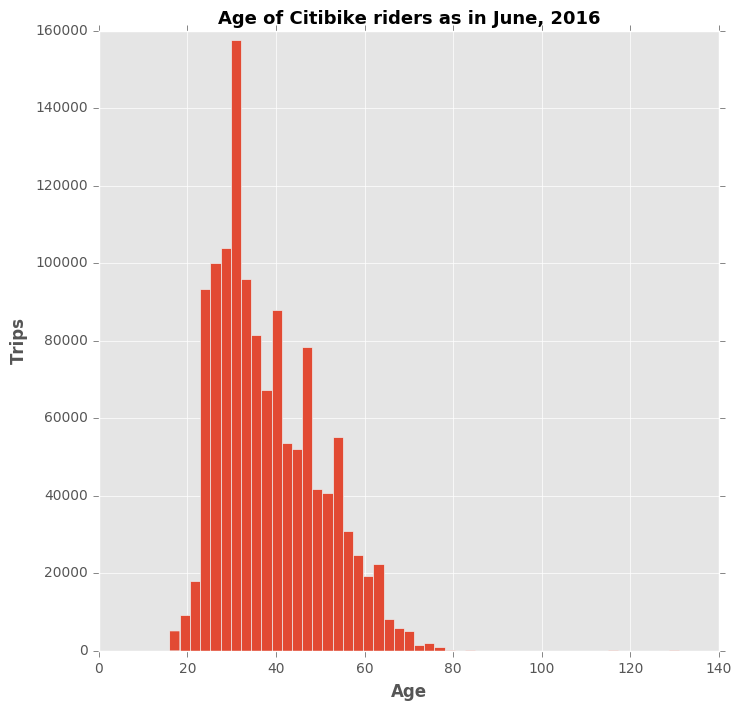

In [53]:
plt.figure(figsize=(8,8))
plt.hist(Age,50)
plt.xlabel("Age", fontweight = 'bold', size = 12)
plt.ylabel('Trips', fontweight = 'bold', size = 12)
plt.title("Age of Citibike riders as in June, 2016", fontweight = 'bold',size=13)
plt.show()

Mean: 38.3405817034 Sigma: 11.5771650938


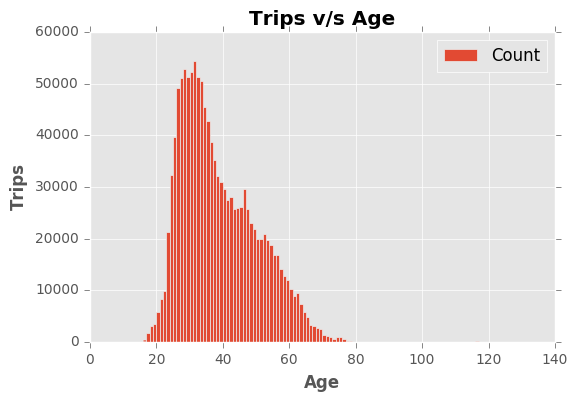

In [54]:
print 'Mean:', df.age.mean(), 'Sigma:', df.age.std()
                                                                                            
bins = np.arange(df.age.min(), df.age.max(), 1)
plt.hist(df.age, bins, label='Count')
plt.title('Trips v/s Age', fontweight = 'bold')
plt.xlabel('Age', fontweight = 'bold')
plt.ylabel('Trips', fontweight = 'bold')
plt.legend()
plt.show()

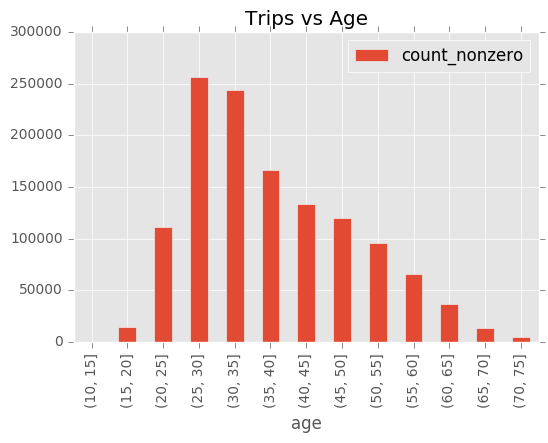

In [55]:
bins = np.arange(10,80,5)
plot = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=True, title = 'Trips vs Age')

In [15]:
#Done with the data setup
# Attempting Tests from here

Q) Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution. 

H0 : Ages of Citibike drivers follow a Gaussian Distribution


Ha : Ages of Citibike drivers do not follow a Gaussian Distribution


Significance Level: 0.05 (5%)

In [40]:
import scipy.stats

#Understanding the KS Test

scipy.stats.kstest?

In [39]:
# KS Test against Normal Distribution

scipy.stats.kstest(df['age'].values,'norm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.10906210911144343, pvalue=0.0)

In [41]:
# Based on the pvalue = 0.0 for KS test, we reject Null Hypothesis

In [42]:
#Chisquare Test against Normal Distribution

scipy.stats.chisquare(df['age'].values)

Power_divergenceResult(statistic=4422566.6556307757, pvalue=0.0)

In [43]:
# Based on the pvalue = 0.0 for Chisq test, we reject Null Hypothesis

# Now testing with Logistic Distribution


H0 : Ages of Citibike drivers taking the Trips follow a Logistic Distribution

Ha : Ages of Citibike drivers taking the Trips do not follow a Logistic Distribution

Significance Level: 0.05 (5%)

In [48]:
#Understanding the AD Test

scipy.stats.anderson?

In [50]:
# AD Test against Logistic Distribution

scipy.stats.anderson(df['age'].values, dist='logistic')

AndersonResult(statistic=18524.755417533917, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

In [ ]:
#Need to understand the critical values and its significance for AD Test.

In [51]:
# KS Test against Logistic Distribution

scipy.stats.kstest(df['age'].values,'logistic', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.18415260938169742, pvalue=0.0)

In [52]:
# Based on the pvalue = 0.0 for Chisq test, we reject Null Hypothesis